In [10]:
import torch
import pickle
from torchvision import transforms
from model import CNNEncoder, LSTMDecoder
from outputgeneration import generate_caption

from PIL import Image
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)


Using device: cuda


In [11]:
with open("vocab.pkl", "rb") as f:
    word2idx, idx2word = pickle.load(f)
vocab_size = len(word2idx)
print("Vocabulary loaded. Vocab size:", vocab_size)


Vocabulary loaded. Vocab size: 5458


In [12]:
embed_size = 256
hidden_size = 512
encoder = CNNEncoder(embed_size=embed_size).to(device)
decoder = LSTMDecoder(embed_size=embed_size, hidden_size=hidden_size, vocab_size=vocab_size).to(device)

encoder.load_state_dict(torch.load("encoder.pth", map_location=device))
decoder.load_state_dict(torch.load("decoder.pth", map_location=device))
print("Models loaded successfully.")


Models loaded successfully.


C:\Users\olawa\AppData\Local\Temp\ipykernel_28604\281318595.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder.pth", map_locatio

In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
print("Transforms defined.")


Transforms defined.


In [14]:
image_path = r"C:\Users\olawa\Downloads\Asa.jpg"

caption = generate_caption(
    encoder=encoder,
    decoder=decoder,
    image_path=image_path,
    transform=transform,
    device=device,
    word2idx=word2idx,
    idx2word=idx2word,
    max_length=20
)
print("Generated Caption:", caption)


DEBUG: encoder output shape = torch.Size([1, 256])
Generated Caption: a man of a a a a a


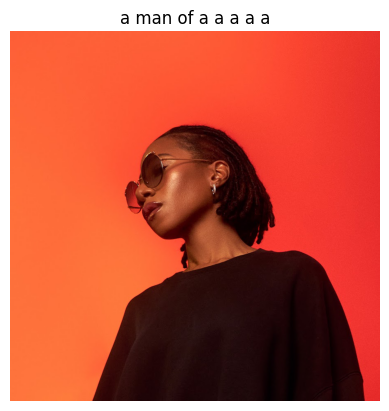

In [16]:
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.title(caption)
plt.axis('off')
plt.show()